In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\PROGETTI LAVORO\\DM1\\ravdess_features.csv")

In [3]:
df.shape

(2452, 38)

In [4]:
del df["actor"]
del df["modality"]
del df["channels"]
del df["mfcc_mean"]
del df["mfcc_std"]
del df["mfcc_min"]
del df["mfcc_max"]
del df["sc_mean"]
del df["sc_std"]
del df["sc_min"]
del df["sc_max"]
del df["sc_kur"]
del df["sc_skew"]
del df["stft_mean"]
del df["stft_std"]
del df["stft_min"]
del df["stft_max"]
del df["stft_kur"]
del df["stft_skew"]
del df["mean"]
del df["std"]
del df["min"]
del df["max"]
del df["kur"]
del df["skew"]
del df["frame_rate"]
del df["sample_width"]
del df["frame_count"]
del df["frame_width"]
del df["emotion"]

In [5]:
df['vocal_channel']=df['vocal_channel'].fillna(pd.Series((np.random.choice(["speech", "song"], p=[0.591, 1-0.591], size=len(df)))))

In [6]:
y=pd.DataFrame(df["vocal_channel"])

In [7]:
x=df.iloc[:,1:5]

In [8]:
x

,emotional_intensity,statement,repetition,sex
0,normal,Dogs are sitting by the door,2nd,F
1,normal,Dogs are sitting by the door,1st,F
2,strong,Dogs are sitting by the door,2nd,F
3,normal,Kids are talking by the door,1st,F
4,strong,Dogs are sitting by the door,2nd,F
...,...,...,...,...
2447,strong,Kids are talking by the door,1st,M
2448,normal,Dogs are sitting by the door,1st,M
2449,strong,Dogs are sitting by the door,2nd,M
2450,normal,Kids are talking by the door,1st,M


In [9]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()

y = pd.DataFrame(label_encoder.fit_transform(y))
y.columns = ['vocal_channel']
y

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,vocal_channel
0,1
1,1
2,0
3,0
4,0
...,...
2447,1
2448,1
2449,0
2450,1


In [10]:
from collections import Counter

counter=Counter(y["vocal_channel"])
counter

Counter({1: 1446, 0: 1006})

<AxesSubplot:title={'center':'vocal channel'}>

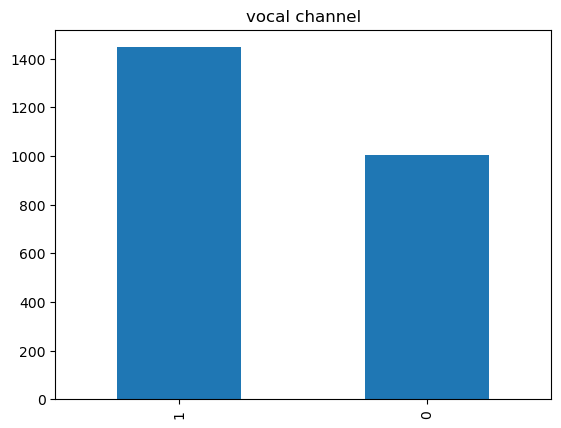

In [11]:
import matplotlib.pyplot as plt

plt.figure()
y['vocal_channel'].value_counts().plot(kind='bar', title='vocal channel')

In [12]:
dcx = pd.get_dummies(x)
X = df.values

In [13]:
Y=np.array(y)

In [14]:
y

,vocal_channel
0,1
1,1
2,0
3,0
4,0
...,...
2447,1
2448,1
2449,0
2450,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
dcx = pd.get_dummies(x)
X = df.values

In [17]:
dcx

,emotional_intensity_normal,emotional_intensity_strong,statement_Dogs are sitting by the door,statement_Kids are talking by the door,repetition_1st,repetition_2nd,sex_F,sex_M
0,1,0,1,0,0,1,1,0
1,1,0,1,0,1,0,1,0
2,0,1,1,0,0,1,1,0
3,1,0,0,1,1,0,1,0
4,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
2447,0,1,0,1,1,0,0,1
2448,1,0,1,0,1,0,0,1
2449,0,1,1,0,0,1,0,1
2450,1,0,0,1,1,0,0,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    dcx, y, test_size=0.3, random_state=0
)

In [19]:
y_test

,vocal_channel
148,1
794,1
33,1
898,1
2183,1
...,...
564,0
294,0
1991,1
2097,1


# decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
num_figli=4
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.001, min_samples_split=0.002)

In [41]:
X_train.value_counts()

emotional_intensity_normal  emotional_intensity_strong  statement_Dogs are sitting by the door  statement_Kids are talking by the door  repetition_1st  repetition_2nd  sex_F  sex_M
1                           0                           0                                       1                                       1               0               0      1        125
                                                        1                                       0                                       0               1               0      1        123
                                                                                                                                        1               0               0      1        120
                                                        0                                       1                                       0               1               0      1        119
                                                        1          

In [22]:
%%time
dt.fit(X_train, y_train)

Wall time: 30 ms


DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.001,
                       min_samples_split=0.002)

In [23]:
dt?

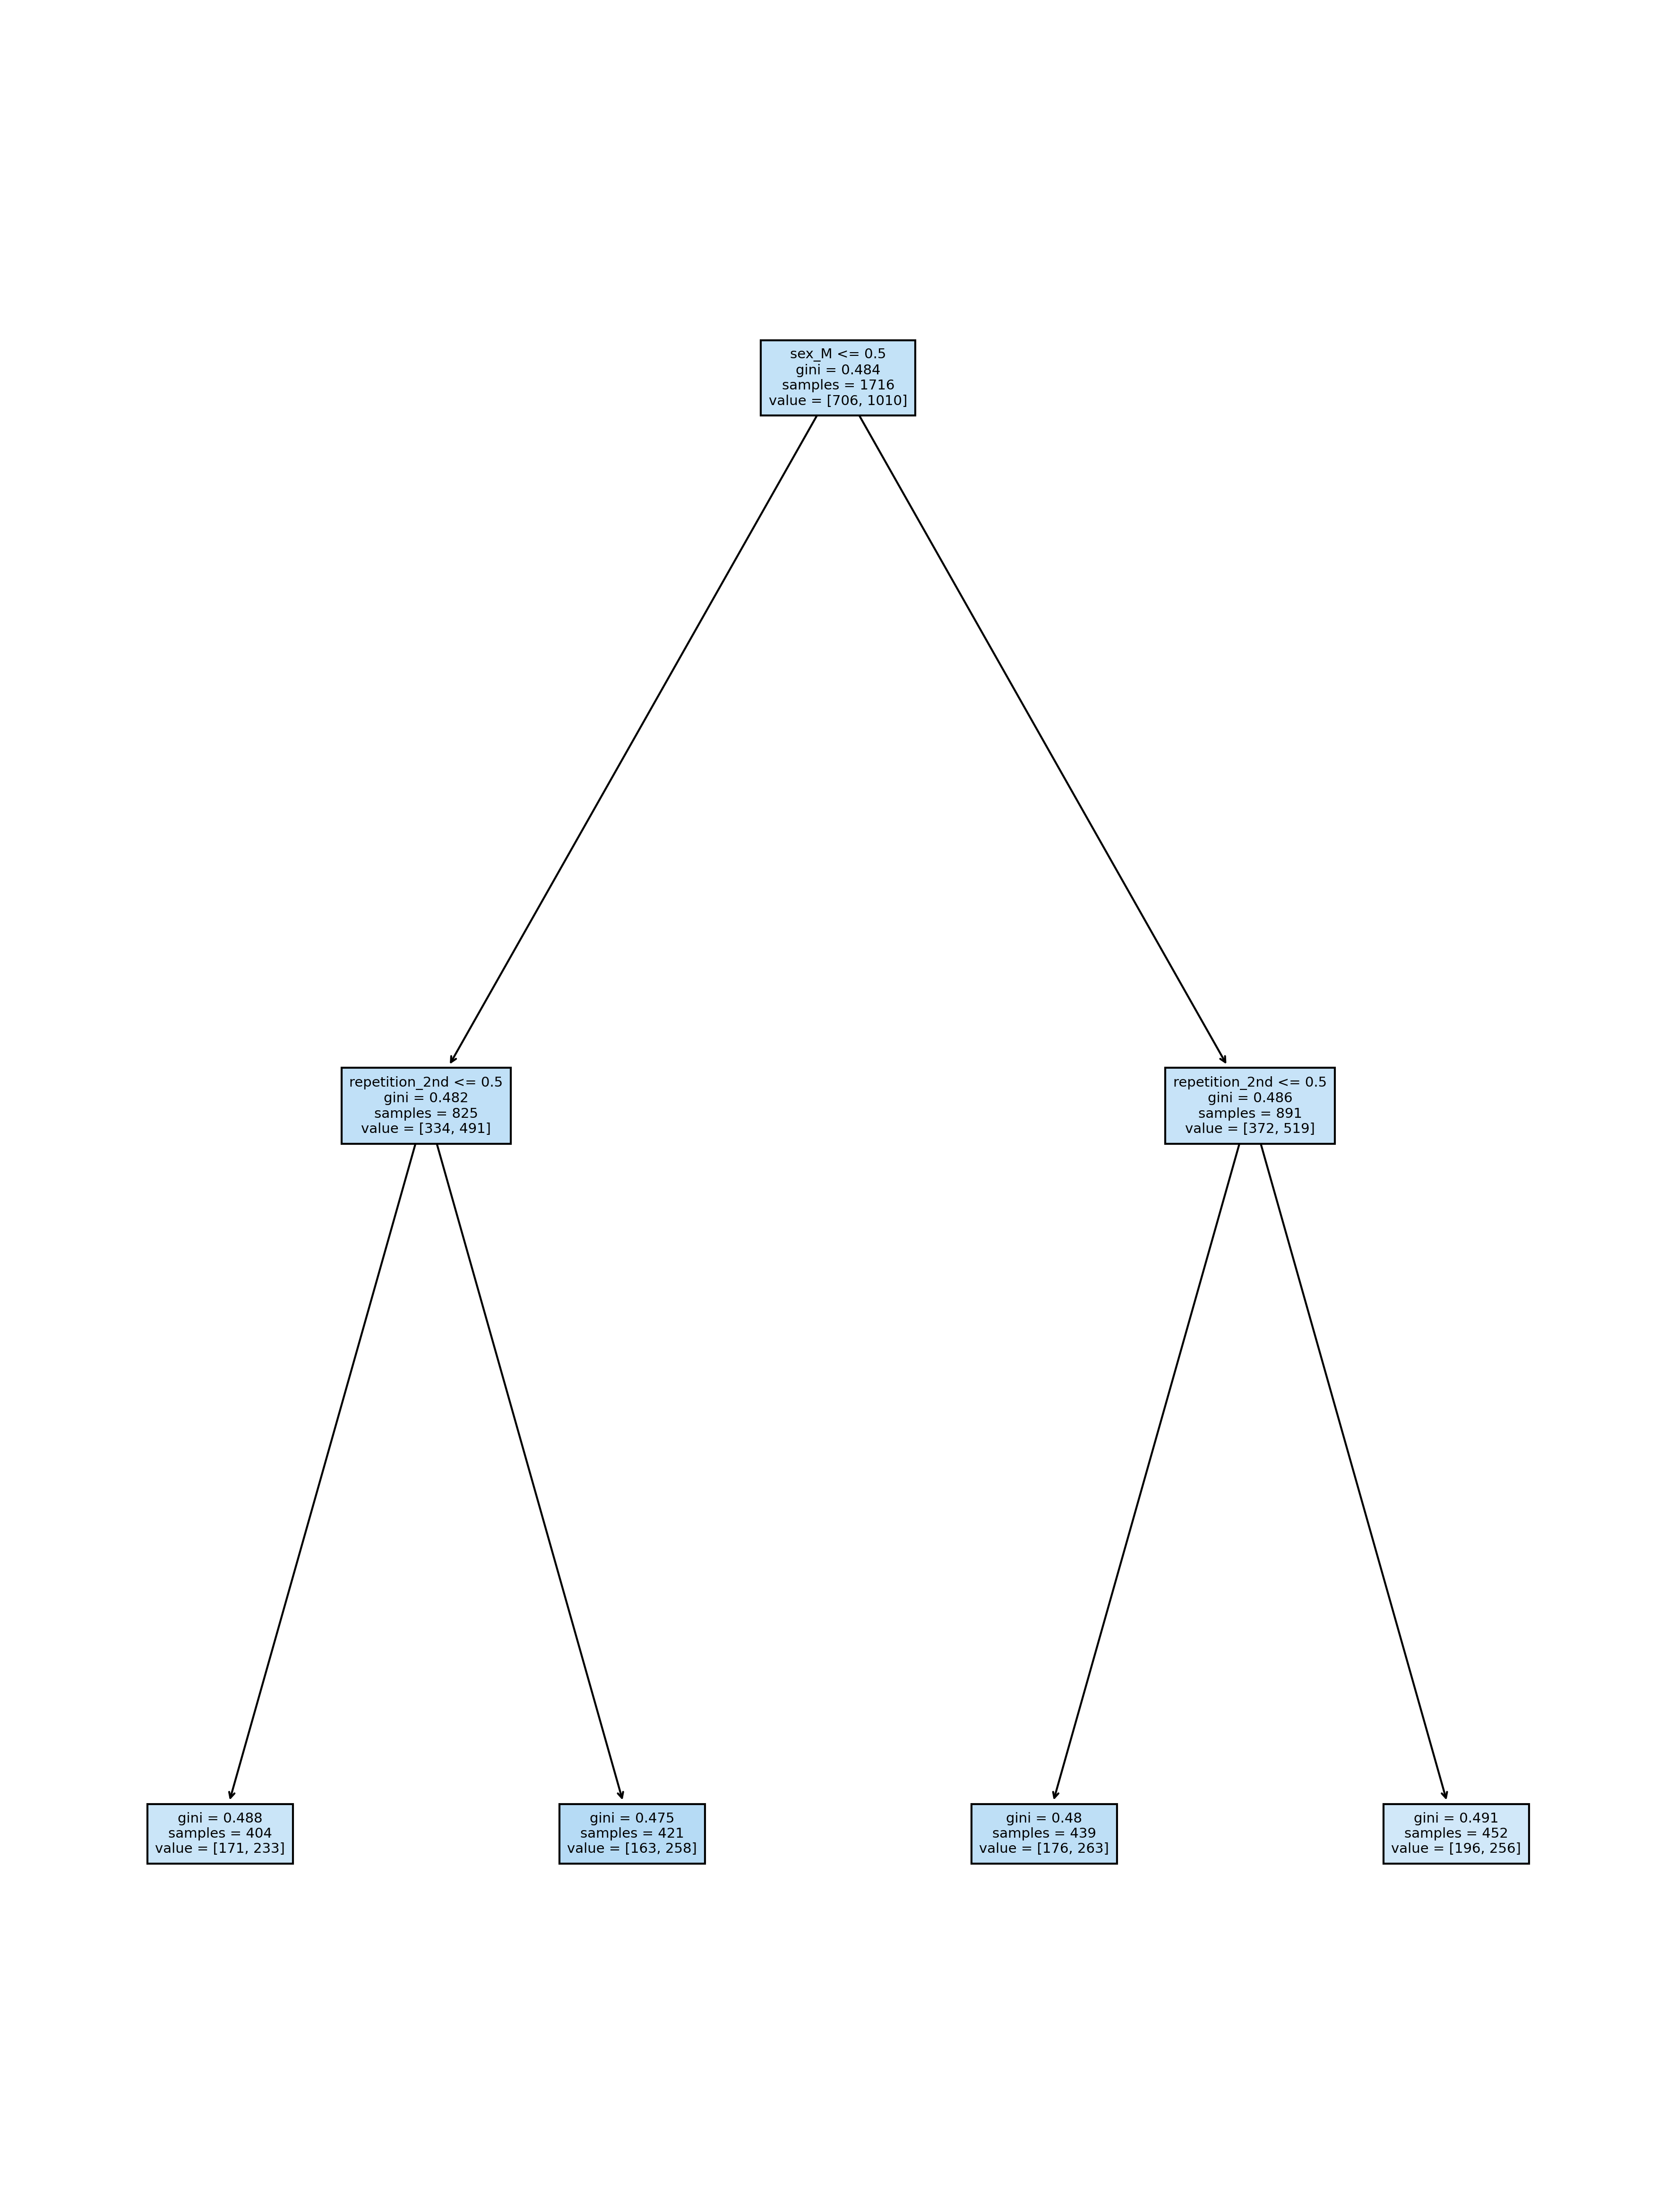

In [24]:
plt.figure(figsize=(15, 20), dpi=300)
plot_tree(dt, feature_names=dcx.columns, filled=True, fontsize=7)
plt.show()

#speech=1, song=0

In [24]:
!pip install scikit-plot


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [26]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))

0.592391304347826
0.3720136518771331


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.59      1.00      0.74       436

    accuracy                           0.59       736
   macro avg       0.30      0.50      0.37       736
weighted avg       0.35      0.59      0.44       736



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
cf

array([[ 89, 207],
       [135, 305]], dtype=int64)

In [36]:
y_test_pred_proba = dt.predict_proba(X_test)

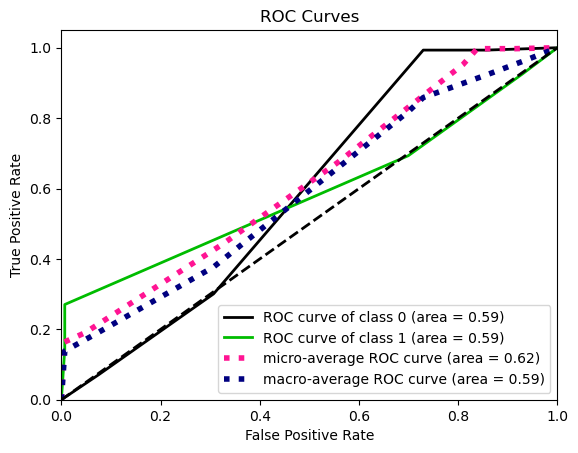

ValueError: y should be a 1d array, got an array of shape (736, 2) instead.

In [37]:
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

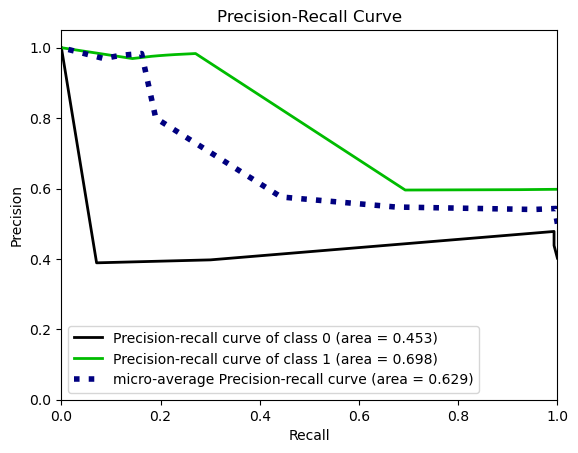

In [38]:
plot_precision_recall(y_test, dt.predict_proba(X_test))
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
max_depth = 2
dt = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dt, X_train, y_train, cv=5)
cross_val_score(dt, X_train, y_train, cv=5)

array([0.58430233, 0.58600583, 0.58309038, 0.58309038, 0.58309038])

In [41]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.5839 (+/- 0.00)


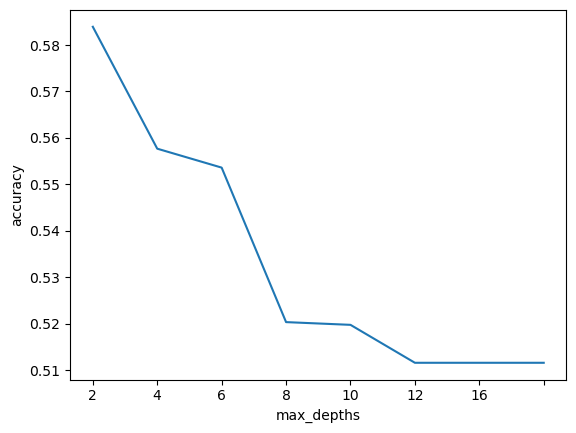

In [42]:
max_depths = [2, 4, 6, 8, 10, 12, 16, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

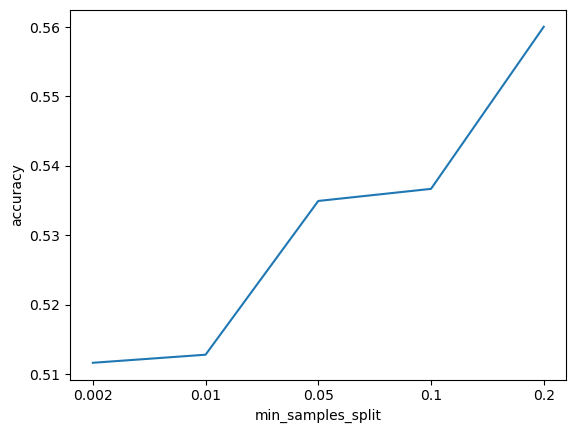

In [43]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

# grid search

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [47]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.001, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [48]:
%%time
grid.fit(X_train, y_train)

Wall time: 14.7 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 16, None],
                         'min_samples_leaf': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.002, 0.01, 0.05, 0.1, 0.2]})

In [49]:
clf = grid.best_estimator_

In [50]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 2, 'min_samples_leaf': 0.001, 'min_samples_split': 0.002} 0.5926571292969015


In [51]:
clf.score(X_test, y_test)

0.6005434782608695

In [50]:
from scipy.stats import uniform, randint, loguniform

In [51]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

Wall time: 7.82 s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3450 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message

In [52]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'max_depth': 78, 'min_samples_leaf': 0.17536344045633298, 'min_samples_split': 0.10339417300112548} 0.5839158587022849


In [53]:
clf.score(X_test, y_test)

0.5978260869565217

# naive bayes

In [54]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [55]:
clf = GaussianNB()

In [56]:
%%time
clf.fit(X_train, y_train)

Wall time: 3.51 ms


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [57]:
y_pred = clf.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.99      0.65       296
           1       0.98      0.27      0.42       440

    accuracy                           0.56       736
   macro avg       0.73      0.63      0.53       736
weighted avg       0.78      0.56      0.51       736



In [59]:
clf.predict_proba(X_test)

array([[0.98513149, 0.01486851],
       [0.94731363, 0.05268637],
       [0.96526556, 0.03473444],
       ...,
       [0.94872238, 0.05127762],
       [0.96417648, 0.03582352],
       [0.9306266 , 0.0693734 ]])

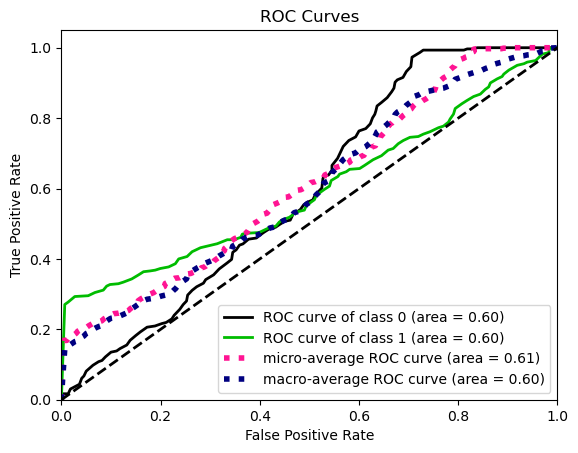

ValueError: y should be a 1d array, got an array of shape (736, 2) instead.

In [60]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

The optimal number of neighbors is  39 


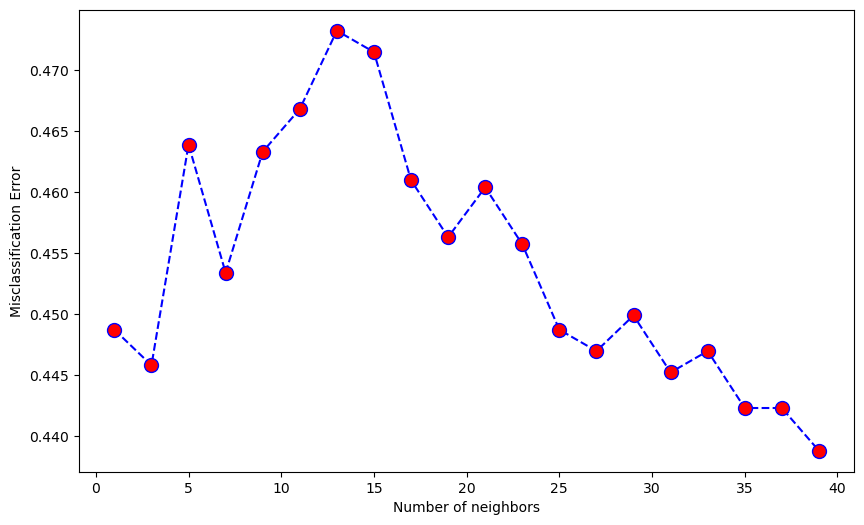

In [62]:
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(knn, X_train, y_train, cv = 4, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show() 

In [63]:
clf_kn = KNeighborsClassifier(n_neighbors= 39, weights= 'uniform') #'distance' -> n= 8 
clf_kn.fit(X_train,y_train)

scores = cross_val_score(clf_kn, X_train, y_train, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_kn, X_train, y_train, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to av

Accuracy: 0.5612 (+/- 0.03)
F1-score: 0.4648 (+/- 0.05)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [ ]:
#Accuracy: 0.5612 (+/- 0.03)
#F1-score: 0.4648 (+/- 0.05)

In [92]:
import os
import keras
import numpy as np
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.applications import MobileNet
from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarni

Confusion matrix, without normalization
[[173 541]
 [141 861]]
Normalized confusion matrix
[[0.24229692 0.75770308]
 [0.14071856 0.85928144]]


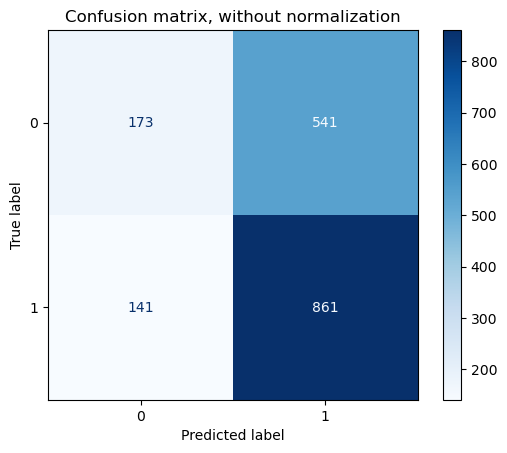

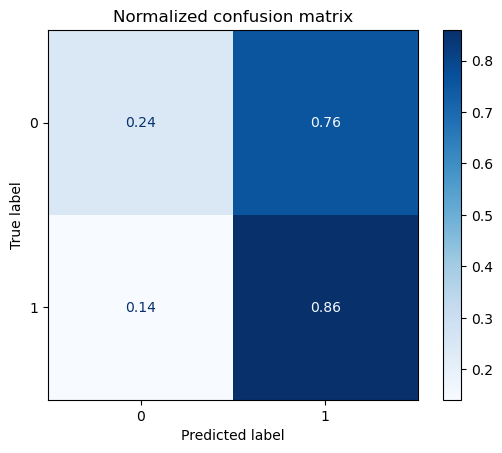

In [65]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Pattern Mining

In [103]:
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,intensity,zero_crossings_sum
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,-36.793432,16995
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,NaN,13906
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,4671,-32.290737,18723
3,song,surprised,normal,Kids are talking by the door,1st,F,3637,-49.019839,11617
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,-31.214503,15137
...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,M,4605,NaN,9871
2448,speech,calm,normal,Dogs are sitting by the door,1st,M,4171,-43.342901,8963
2449,song,sad,strong,Dogs are sitting by the door,2nd,M,5239,NaN,9765
2450,speech,surprised,normal,Kids are talking by the door,1st,M,3737,-45.751265,9716


In [104]:
df["intensity"]=df["intensity"].fillna(pd.Series([np.random.normal(loc=df["intensity"].mean(), scale=df["intensity"].std()) for x in range(len(df))]))

In [105]:
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,intensity,zero_crossings_sum
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,-36.793432,16995
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,-42.563134,13906
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,4671,-32.290737,18723
3,song,surprised,normal,Kids are talking by the door,1st,F,3637,-49.019839,11617
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,-31.214503,15137
...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,M,4605,-49.748332,9871
2448,speech,calm,normal,Dogs are sitting by the door,1st,M,4171,-43.342901,8963
2449,song,sad,strong,Dogs are sitting by the door,2nd,M,5239,-42.245764,9765
2450,speech,surprised,normal,Kids are talking by the door,1st,M,3737,-45.751265,9716


In [106]:
df.dtypes

vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
sex                     object
length_ms                int64
intensity              float64
zero_crossings_sum       int64
dtype: object

In [107]:
dpm=df.iloc[:,0:5]

In [108]:
dpm

,vocal_channel,emotion,emotional_intensity,statement,repetition
0,speech,fearful,normal,Dogs are sitting by the door,2nd
1,speech,angry,normal,Dogs are sitting by the door,1st
2,speech,happy,strong,Dogs are sitting by the door,2nd
3,song,surprised,normal,Kids are talking by the door,1st
4,song,happy,strong,Dogs are sitting by the door,2nd
...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st
2448,speech,calm,normal,Dogs are sitting by the door,1st
2449,song,sad,strong,Dogs are sitting by the door,2nd
2450,speech,surprised,normal,Kids are talking by the door,1st


In [ ]:
X = dpm.values.tolist()

# apriori

In [114]:
!pip install pyfim
from fim import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
apriori?

In [115]:
#frequent itemset
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(song, Dogs are sitting by the door)",20.636215
1,"(song, 2nd)",20.473083
2,"(song, Kids are talking by the door)",20.228385
3,"(song, 1st)",20.391517
4,"(song, M)",21.411093
5,"(song, normal)",22.185971
6,"(strong, F)",22.675367
7,"(strong, Dogs are sitting by the door)",23.083197
8,"(strong, 2nd)",23.083197
9,"(strong, Kids are talking by the door)",23.083197


In [116]:
#closed itemset
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(song, Dogs are sitting by the door)",20.636215
1,"(song, 2nd)",20.473083
2,"(song, Kids are talking by the door)",20.228385
3,"(song, 1st)",20.391517
4,"(song, M)",21.411093
5,"(song, normal)",22.185971
6,"(strong, F)",22.675367
7,"(strong, Dogs are sitting by the door)",23.083197
8,"(strong, 2nd)",23.083197
9,"(strong, Kids are talking by the door)",23.083197


In [117]:
#maximal itemset
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(song, Dogs are sitting by the door)",20.636215
1,"(song, 2nd)",20.473083
2,"(song, Kids are talking by the door)",20.228385
3,"(song, 1st)",20.391517
4,"(song, M)",21.411093
5,"(song, normal)",22.185971
6,"(strong, F)",22.675367
7,"(strong, Dogs are sitting by the door)",23.083197
8,"(strong, 2nd)",23.083197
9,"(strong, Kids are talking by the door)",23.083197


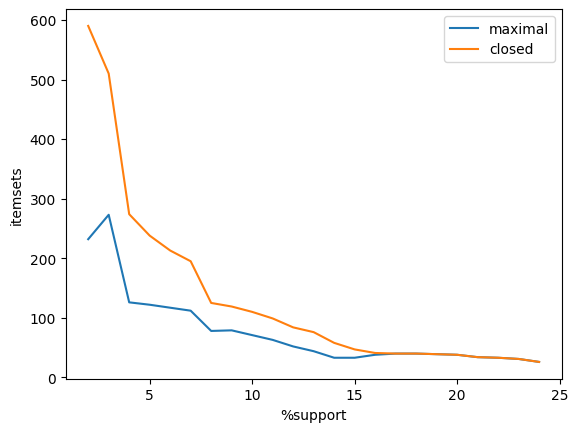

In [118]:
#support vs number of items
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

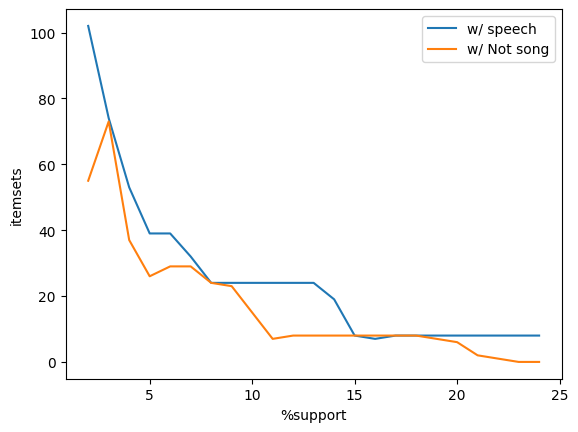

In [119]:
#Support vs number of itemset for speech / song
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "speech" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "song" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ speech")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Not song")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

# fp growth

In [120]:
from fim import fpgrowth

In [128]:
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=20, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(normal, speech)",31.647635
1,"(M, speech)",29.486134
2,"(M, normal)",27.406199
3,"(Dogs are sitting by the door, speech)",29.363785
4,"(Dogs are sitting by the door, normal)",26.916803
5,"(Dogs are sitting by the door, M)",25.448613
6,"(2nd, speech)",29.526917
7,"(2nd, normal)",26.916803
8,"(2nd, M)",25.448613
9,"(2nd, Dogs are sitting by the door)",25.000000


In [139]:
conf = 55
rules = fpgrowth(X, target="r", supp=supp, zmin=2, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,speech,"(normal,)",776,31.647635,0.587879,0.994123
1,speech,"(M,)",723,29.486134,0.579327,0.979662
2,speech,"(M, normal)",387,15.783034,0.575893,0.973855
3,speech,"(Dogs are sitting by the door,)",720,29.363785,0.587276,0.993103
4,speech,"(Dogs are sitting by the door, normal)",381,15.538336,0.577273,0.976188
5,speech,"(Dogs are sitting by the door, M)",362,14.763458,0.580128,0.981017
6,speech,"(2nd,)",724,29.526917,0.590538,0.998621
7,speech,"(2nd, normal)",391,15.946166,0.592424,1.001810
8,speech,"(2nd, M)",359,14.641109,0.575321,0.972887
9,speech,"(2nd, Dogs are sitting by the door)",358,14.600326,0.584013,0.987586
